# Homework 1
## Problem 1

In [1]:
import pandas as pd

df = pd.read_csv("datasets/auto-mpg.data", delim_whitespace=True, names=['mpg','cylinders','displacement','horsepower','weight', 'acceleration', 'model_year', 'origin', 'car_name'])
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
df_original = df.shape
#df.replace('?', np.nan, inplace = True) #replace '?' with null 

#df[df['horsepower'].isnull() == True]                                  #find all rows where the horsepower column has value of null
missing_item_index = df[df['horsepower'].values == '?'].index.tolist()   #Store the index of missing item in list
missing_rows = df[df['horsepower'].values == '?']                        #find all rows where the horsepower column has value of ?
df.drop(labels = missing_item_index, axis = 0, inplace = True)                 #remove all rows where the cell has value ? and make the changes to df





In [3]:
# Percentage of missing values out of all rows and out of all values.
missing_item_percentage_row = missing_rows.shape[0]/df_original[0]*100
missing_item_percentage_all_values = missing_rows.shape[0]/(df_original[0]*df_original[1])*100


In [4]:
make_of_car = []
for i in range(df_original[0]):
    if i not in missing_item_index:             
        make_of_car.append(df.loc[i, 'car_name'].split()[0])       #append the make of car to the list, split creates a list that separates the string based on whitespace
df['make of car'] = make_of_car    #add a new column named 'make of car' to the dataframe and set it to the list


<AxesSubplot:xlabel='make of car'>

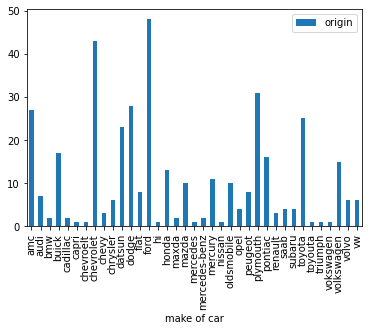

In [5]:
df.groupby('make of car').count().reset_index().plot.bar(x = 'make of car', y = 'origin') 
#bar plot of the make of car with respect to count of make of car

## Problem 2

In [6]:
df['weight bins'] = pd.cut(x = df['weight'], bins = pd.interval_range(start = 1613, end = 5140, periods = 3))
df['weight bins'].value_counts().sort_index(ascending = False)  

#interval range returns a list with the equal ranges of weight
#pd.interval range returns [1613, 2788.667, 3964.334, 5140]
#The thresholds are 1613, 2788.667, 3964.334, 5140
#learned from a site https://kanoki.org/2020/04/20/how-to-create-bins-in-pandas-using-cut-and-qcut/
#cut divides the weight column into ranges of weight with 3 equally sized bins


(3964.3333333333335, 5140.0]                65
(2788.666666666667, 3964.3333333333335]    135
(1613.0, 2788.666666666667]                191
Name: weight bins, dtype: int64

<AxesSubplot:xlabel='Weight Categories'>

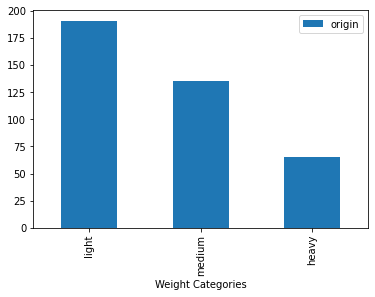

In [7]:
df['Weight Categories'] = pd.cut(x = df['weight'], bins = [1613, 2788.667, 3964.334, 5140], labels = ['light', 'medium', 'heavy'])
df.groupby('Weight Categories').count().reset_index().plot.bar(x = 'Weight Categories', y = 'origin') 

In [8]:
df.drop(['Weight Categories'], axis = 1, inplace = True)
df.drop(['make of car'], axis = 1, inplace = True)
df.drop(['weight bins'], axis = 1, inplace = True)

#drop all columns modified to the dataframe


## Problem 3 

<AxesSubplot:>

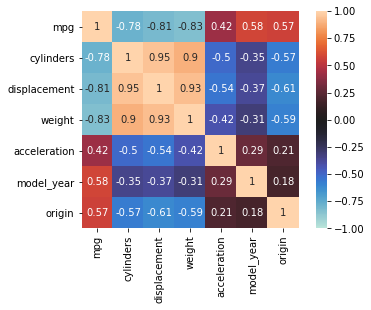

In [9]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, center = 0, square = True)

#displacement has a strong correlation with cylinders.This is because engine displacement is found by using cylinders as a parameter
#weight is also strongly correlated to cylinders and therefore displacement
#mpg is negatively coreelated with cylinders, displacement, weight while strongly correlated with acceleration, model-year, and origin
#the fact that mpg is positively correlated with acceleration matches my expectation because as the acceleration increases miles traveled per gallon also increases.

#### Displacement has a strong correlation with cylinders.This is because engine displacement is found by using cylinders as a parameter. Weight is also strongly correlated to cylinders and therefore displacement. Mpg is negatively coreelated with cylinders, displacement, weight while strongly correlated with acceleration, model-year, and origin. The fact that mpg is positively correlated with acceleration matches my expectation because as the acceleration increases miles traveled per gallon also increases.

## Problem 4

In [10]:
import numpy as np

class LinearRegression:
    def __init__(self):
        return
        
    
    def fit(self, x, y, order):
        self.index = 0
        
        self.X = np.ones(len(x))   #initialize X as a matrix having columns of ones. This corresponds to polynomial of order 0
        while True:
            if self.index < order and order != 0:                          #concatenate power of x to original matrices X
                self.index += 1
                self.X = np.c_[self.X, np.power(x, self.index)]
            
            else:
                break
        self.b = np.linalg.inv(self.X.T@self.X)@(self.X.T@y)           # w = (X^T*X)^-1*(X^T*y) Formula given in lecture
        
        
        return self.X, self.b
    
    def predict(self, x, y, order):
        self.predict = self.fit(x, y, order)
        self.predict_array = self.predict[0]@self.predict[1]                  #prediction array is just X*w
        
        return self.predict_array
    
    
    def mse(self, x, y, order):
        self.y_hat = self.predict(x, y, order)
        self.mse_array = y - self.y_hat
        
        self.mse = np.power(self.mse_array, 2)
        
        return np.sum(self.mse)/len(y)
            
        


In [14]:
df['horsepower'] = df['horsepower'].astype(float)
df['cylinders'] = df['cylinders'].astype(float)
x = np.array(df['horsepower'])
y = np.array(df['cylinders'])
hello = LinearRegression()
hello.mse(x,y,4)

#Testing Linear Regression code

0.5871109925367444